### **Chapter 01. 다중 회귀**

In [4]:
import pandas as pd

# 1) Series -> 1-D vector
# 2) DataFrame -> 2-D array

df = pd.read_csv("Fish.csv") # DataFrame
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(df.shape)

(159, 7)


In [6]:
# 부울린 인덱싱(Boolean Indexing), 불 인덱싱 -> True, False
df = df[df["Species"] == "Perch"]

In [7]:
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.112,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.528,1.9992


In [8]:
# 원하는 열(Columns)을 추출하기!
x = df[["Length2", "Height", "Width"]] # 특성값 3가지

x.head(1)

,Length2,Height,Width
72,8.4,2.112,1.408


In [9]:
y = df[["Weight"]] # 레이블(label) -> y

y.head(1)

,Weight
72,5.9


In [10]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
x = x.to_numpy()
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[ 8.4     2.112   1.408 ]
 [13.7     3.528   1.9992]
 [15.      3.824   2.432 ]
 [16.2     4.5924  2.6316]
 [17.4     4.588   2.9415]
 [18.      5.2224  3.3216]
 [18.7     5.1992  3.1234]
 [19.      5.6358  3.0502]
 [19.6     5.1376  3.0368]
 [20.      5.082   2.772 ]
 [21.      5.6925  3.555 ]
 [21.      5.9175  3.3075]
 [21.      5.6925  3.6675]
 [21.3     6.384   3.534 ]
 [22.      6.11    3.4075]
 [22.      5.64    3.525 ]
 [22.      6.11    3.525 ]
 [22.      5.875   3.525 ]
 [22.      5.5225  3.995 ]
 [22.5     5.856   3.624 ]
 [22.5     6.792   3.624 ]
 [22.7     5.9532  3.63  ]
 [23.      5.2185  3.626 ]
 [23.5     6.275   3.725 ]
 [24.      7.293   3.723 ]
 [24.      6.375   3.825 ]
 [24.6     6.7334  4.1658]
 [25.      6.4395  3.6835]
 [25.6     6.561   4.239 ]
 [26.5     7.168   4.144 ]
 [27.3     8.323   5.1373]
 [27.5     7.1672  4.335 ]
 [27.5     7.0516  4.335 ]
 [27.5     7.2828  4.5662]
 [28.      7.8204  4.2042]
 [28.7     7.5852  4.6354]
 [30

In [12]:
print(x.shape)

(56, 3)


In [13]:
y = y.to_numpy()
print(type(y))
print(y)

<class 'numpy.ndarray'>
[[   5.9]
 [  32. ]
 [  40. ]
 [  51.5]
 [  70. ]
 [ 100. ]
 [  78. ]
 [  80. ]
 [  85. ]
 [  85. ]
 [ 110. ]
 [ 115. ]
 [ 125. ]
 [ 130. ]
 [ 120. ]
 [ 120. ]
 [ 130. ]
 [ 135. ]
 [ 110. ]
 [ 130. ]
 [ 150. ]
 [ 145. ]
 [ 150. ]
 [ 170. ]
 [ 225. ]
 [ 145. ]
 [ 188. ]
 [ 180. ]
 [ 197. ]
 [ 218. ]
 [ 300. ]
 [ 260. ]
 [ 265. ]
 [ 250. ]
 [ 250. ]
 [ 300. ]
 [ 320. ]
 [ 514. ]
 [ 556. ]
 [ 840. ]
 [ 685. ]
 [ 700. ]
 [ 700. ]
 [ 690. ]
 [ 900. ]
 [ 650. ]
 [ 820. ]
 [ 850. ]
 [ 900. ]
 [1015. ]
 [ 820. ]
 [1100. ]
 [1000. ]
 [1100. ]
 [1000. ]
 [1000. ]]


In [14]:
print(y.shape)

(56, 1)


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [16]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(42, 3) (42, 1)
(14, 3) (14, 1)


### **Chapter 02. 사이킷런의 변환기**

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(include_bias=True) # bias = y 절편
poly.fit([[4, 2]]) # --> x1, x2, x1^2, x2^2, x1*x2
print(poly.transform([[3,5]]))

[[ 1.  3.  5.  9. 15. 25.]]


In [19]:
poly = PolynomialFeatures(include_bias=False) # 변환기 클래스

poly.fit(x_train) # (x1, x2, x3) --> (x1^2, x2^2, x3^2, x1*x2, x1*x3, x2*x3)
x_train_poly = poly.transform(x_train)

In [20]:
print(x_train_poly.shape) # 특성이 9개가 나올줄 알았는데 10개가 나왔음
#print(x_train_poly)

(42, 9)


In [21]:
x_test_poly = poly.transform(x_test)
print(x_test_poly.shape)

(14, 9)


In [22]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

### **Chapter 03. 다중 회귀 모델 훈련하기**

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_poly, y_train) # 계수, 절편 값을 찾아라!

print("학습용:", lr.score(x_train_poly, y_train))
print("시험용:", lr.score(x_test_poly, y_test))

학습용: 0.9903557670312703
시험용: 0.9712376207461859


In [24]:
poly.degree # 최고 차항의 차수 

2

In [25]:
poly = PolynomialFeatures(include_bias=False, degree=5) # x1^5

poly.fit(x_train) # (x1, x2, x3) --> (x1^2, x2^2, x3^2, x1*x2, x1*x3, x2*x3)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

print(x_train_poly.shape)
print(x_test_poly.shape)

(42, 55)
(14, 55)


In [26]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [27]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # 계수, 절편 값을 찾아라!

# 과대적합 -> 수능 망함
print("학습용:", lr.score(x_train_poly, y_train))
print("시험용:", lr.score(x_test_poly, y_test))

학습용: 0.9999999999991127
시험용: -129.88010840656509


In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train_poly) # mean, std 계산해줌

print(ss.mean_)
print(ss.scale_)

[2.84452381e+01 8.04177619e+00 4.82055476e+00 8.85315000e+02
 2.53470948e+02 1.51956220e+02 7.29276742e+01 4.36967156e+01
 2.62853281e+01 2.97326070e+04 8.59774772e+03 5.15176747e+03
 2.49656208e+03 1.49553817e+03 8.99087988e+02 7.27845314e+02
 4.35963245e+02 2.62077075e+02 1.58112864e+02 1.05917983e+06
 3.08417994e+05 1.84632019e+05 9.01174973e+04 5.39424625e+04
 3.23950805e+04 2.64197426e+04 1.58147036e+04 9.49827765e+03
 5.72355360e+03 7.77060032e+03 4.65212847e+03 2.79466584e+03
 1.68451523e+03 1.01877250e+03 3.93876111e+07 1.15189511e+07
 6.88783177e+06 3.37848356e+06 2.02012802e+06 1.21163040e+06
 9.93702300e+05 5.94216722e+05 3.56448011e+05 2.14482543e+05
 2.93083339e+05 1.75288678e+05 1.05174815e+05 6.33063832e+04
 3.82250476e+04 8.66772369e+04 5.18541727e+04 3.11238569e+04
 1.87420990e+04 1.13226020e+04 6.86230209e+03]
[8.72831196e+00 2.87358833e+00 1.74573191e+00 5.24782988e+02
 1.60841461e+02 9.64592547e+01 4.95192352e+01 2.97533677e+01
 1.81067398e+01 2.50155373e+04 7.49296

In [29]:
# 표준 점수화 되어 z score가 됨
x_train_scaled = ss.transform(x_train_poly)
x_test_scaled = ss.transform(x_test_poly)

In [44]:
# Ridge(릿지) -> 과대적합, 차원축소 회피 가능

from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(x_train_scaled, y_train)

print(x_train_scaled.shape)
print("학습용:", ridge.score(x_train_scaled, y_train))
print("시험용:", ridge.score(x_test_scaled, y_test))

(42, 55)
학습용: 0.9896217956447124
시험용: 0.9788853860988004


In [45]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for a in alpha:
    ridge = Ridge(alpha=a)

    ridge.fit(x_train_scaled, y_train)

    train_score.append(ridge.score(x_train_scaled, y_train))
    test_score.append(ridge.score(x_test_scaled, y_test))
    
print(train_score)
print(test_score)

[0.9930679875694637, 0.9918120087949348, 0.9904048455941404, 0.9896217956447124, 0.9887366307205133, 0.9841994538470815]
[0.9560293715495922, 0.9796497117193657, 0.9826465162736637, 0.9788853860988004, 0.9722857046398284, 0.9624191421271446]


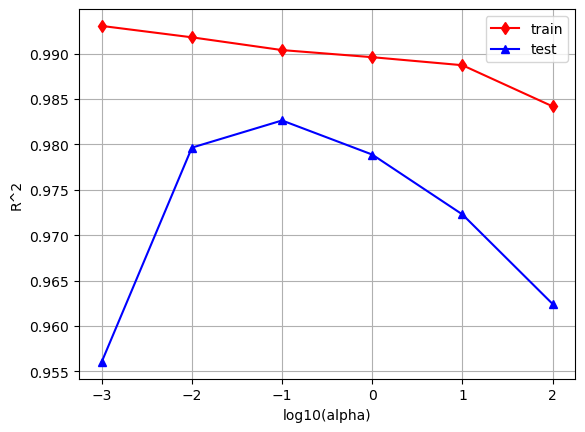

In [47]:
import matplotlib.pyplot as plt

#  x축에 log10()을 적용해서 그래프를 그림!
# 0.001 -> log10(10e-3) -> -3
# 0.01 -> log10(10e-2) -> -2
# 0.1 -> log10(10e-1) -> -1
# 1 -> log10(10e-0) -> -0

import numpy as np
x_axis = np.log10(alpha)

plt.figure()
plt.plot(x_axis, train_score, label="train", marker='d', color="red")
plt.plot(x_axis, test_score, label="test", marker='^', color="blue")
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.grid()
plt.legend()
plt.show()
# train 과소적합 발생
# test 특정 계수에 몰빵

In [33]:
ridge = Ridge(alpha=0.1)

ridge.fit(x_train_scaled, y_train)

print(x_train_scaled.shape)
print("학습용:", ridge.score(x_train_scaled, y_train))
print("시험용:", ridge.score(x_test_scaled, y_test))

(42, 55)
학습용: 0.9904048455941404
시험용: 0.9826465162736637


In [34]:
# Lasso (라쏘)
from sklearn.linear_model import Lasso

lasso = Lasso() # 추정기 클래스 -> fit(), score(), predict()
lasso.fit(x_train_scaled, y_train)

print("학습용:", lasso.score(x_train_scaled, y_train))
print("시험용:", lasso.score(x_test_scaled, y_test))

학습용: 0.9898014198970121
시험용: 0.9798798667260246


In [35]:
# 규제 강도 alpha의 기본값
print(lasso.alpha) # alpha -> 하이퍼 파라미터임!!! -> 즉, 인간이 직접 최적의 값을 찾아야 함

1.0


In [36]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:
    #print(alpha)
    lasso = Lasso(alpha = alpha) # 추정기 클래스 -> fit(), score(), predict()
    lasso.fit(x_train_scaled, y_train)

    train_score.append(lasso.score(x_train_scaled, y_train))
    test_score.append(lasso.score(x_test_scaled, y_test))
    
print(train_score)
print(test_score)

[0.990885793140726, 0.9908215419660339, 0.990158410124092, 0.9898014198970121, 0.9888208857886491, 0.9078705774151945]
[0.9835337219178569, 0.9835218690835712, 0.9818250769195748, 0.9798798667260246, 0.9823020708550176, 0.9088212580432731]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.020e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.790e+02, tolerance: 

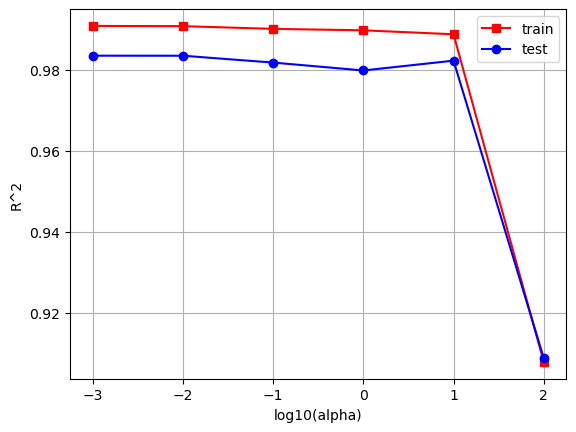

In [37]:
plt.figure()
plt.plot(np.log10(alpha_list), train_score, label="train", marker='s', color="red")
plt.plot(np.log10(alpha_list), test_score, label="test", marker='o', color="blue")
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.grid()
plt.legend()
plt.show()

# alpha값 10을 기준으로 과소적합

In [38]:
lasso = Lasso(alpha=10)
lasso.fit(x_train_scaled, y_train)

print("학습용:", lasso.score(x_train_scaled, y_train))
print("시험용:", lasso.score(x_test_scaled, y_test))

학습용: 0.9888208857886491
시험용: 0.9823020708550176


In [39]:
# 릿지(Ridge) -> 계수 제곱의 합을 규제함!!
# 라쏘(Lasso) -> 계수 합을 규제함!!

# 계수가 가질 수 있는 값
# 릿지 -> 0으로 만들 순 없음!!!
# 라쏘 -> 0으로 만들 수 있임!!!

In [40]:
print(ridge.coef_)

[[ 2.76892628e+01 -1.83584948e+00 -1.95533898e+01  3.01443623e+01
   1.71123377e+01  1.77338905e+01  4.58691290e+00  3.78634741e+00
   2.29633132e+01  1.95546393e+01  1.79106518e+01  1.42889189e+01
   1.35488405e+01  7.40803906e+00  1.90664802e+01  5.31335570e+00
  -2.20221783e+00  1.04655501e+01  4.18531586e+01  5.91176135e+00
   1.50914960e+01 -7.36368453e-01  2.00950871e+01  1.09208858e+00
  -1.30290300e+00  1.99185516e+01 -1.31058193e+00 -3.82067084e+00
   1.18902263e+01  1.38180301e+01 -8.62947643e+00 -1.02607468e+01
   8.32664340e+00  4.58293381e+01 -6.18066720e+00  1.36045427e+01
  -1.78391661e+01  2.85760395e+01 -6.63342097e+00 -2.60989590e+01
   3.77201142e+01 -4.34689550e-01 -2.09765252e+01 -2.38355405e+01
   4.02104486e+01  1.28473247e-03 -2.06941773e+01 -2.18012378e+01
  -3.82797476e+00  3.54389670e+01 -5.86274121e+00 -2.57262656e+01
  -2.41156940e+01 -1.70583491e+00  4.01646977e+01]]


In [41]:
# 계수 -> coefficient -> coef_
print(np.sum(lasso.coef_ == 0.0))
# 55개 특성 -> 40개를 사용하지 않음! -> 15개 특성만으로 예측!
# Feature Selection -> PCA, Lasso(규제)

40
